# **Homework 5**

Due: **October 22nd, 5pm** (late submission until October 25th, 5pm -- no submission possible afterwards)

Written assignment: 5 points

Coding assignment: 25 points

Project report: 10 points

### Name: [TODO]

### Link to the github repo: [TODO]

## **Written Assignment** (5 points)

### **AdaBoost and Decision Stumps**

Below is a graph of points, which are classified as `+` or `-`. The
features are the $x$ and $y$ coordinates.

![image](hw5_02.png)

*Note:* Decision stumps are 1D decision trees. For continuous features
(in our case, x and y values) a threshold value is chosen, and there is
a chosen classification for inputs falling above or below that
threshold. For example, one decision stump may be the vertical line
represented `x `$>$` 2`, with values satisfying this (i.e., to the right
of the line) being classified one way, and values not satisfying this
(i.e., to the left of the line) being classified separately. Note that
decision stumps are **not** equivalent to halfspaces. See example
below.

![image](decision_stump.png)

### **Question 1**
Using decision stumps, produce images representing a simulation of
the Adaboost algorithm on this dataset. Represent the changing
relative weight of each datapoint by enlarging or shrinking the
symbol (+/-). Each image should represent one step of the algorithm,
and the last image should be the final classification of the
ensemble. Recall that decision stumps can only be vertical or
horizontal.

In [47]:
from IPython.display import display, Image, HTML
#display(Image(filename = "./1.jpg"))
print("\nSolution:")
print("\nThe initial three images illustrate the steps of the Adaboost algorithm, while the \nfinal image showcases the ensemble's ultimate classification.\n")
display(HTML("""
    <div style="display: flex; flex-direction: column; align-items: center;">
        <img src="./1.jpg" alt="Image">
        <p>Step 1</p>
    </div>
"""))

display(HTML("""
    <div style="display: flex; flex-direction: column; align-items: center;">
        <img src="./2.jpg" alt="Image">
        <p>Step 2</p>
    </div>
"""))

display(HTML("""
    <div style="display: flex; flex-direction: column; align-items: center;">
        <img src="./3.jpg" alt="Image">
        <p>Step 3</p>
    </div>
"""))

display(HTML("""
    <div style="display: flex; flex-direction: column; align-items: center;">
        <img src="./4.jpg" alt="Image">
        <p>Step 4</p>
    </div>
"""))


Solution:

The initial three images illustrate the steps of the Adaboost algorithm, while the 
final image showcases the ensemble's ultimate classification.



**Solution:**



# **Programming Assignment** (25 points)

### Introduction

In this assignment, you will be implementing Decision Trees to solve
binary classification problems. By the end of this assignment, you will
have a classifier that you will use to predict the result of chess
matches and classify emails as spam. We recommend that you start this
assignment early, as the logic you have to implement may be complicated.

### Stencil Code

We have provided the following stencil code within this file:

-   `Models` contains the `DecisionTree` class, which will contain
    the bulk of the code you write.

-   `Check Model` contains a series of tests to ensure you are coding your 
    model properly.

-   `Main` is the entry point of your program, which will read in the
    data, run the classifiers and print the results. You will make small
    modifications to this file.

-   `Get Data` contains the data loading and processing. You do
    **not** need to change this file.


You should *not* modify any code in `Get Data`. All the functions you
need to fill in reside in `Main` and `Models`, marked by `TODO`s.

### Data

#### Spambase Dataset

You will be testing your Decision Trees on a real world dataset, the
Spambase dataset. Our goal is to train a model that can classify whether
an email is spam or not. The dataset features attributes such as the
frequency of certain words and the amount of capital letters in a given
message. You can find more details on the dataset
[**here**](https://archive.ics.uci.edu/ml/datasets/spambase). We will
only be using a subset of the full dataset.

#### Chess Dataset

Each row of the `chess.csv` dataset contains 36 features, which
represent the current state of the chess board. Given this
representation, the task is to use the Decision Trees to classify
whether or not it is possible for white to win the game. For more
information on the dataset, see
[**here**](https://archive.ics.uci.edu/ml/datasets/Chess+(King-Rook+vs.+King-Pawn)).

We have taken care of all the data preprocessing required so that you
can focus on implementing the machine-learning algorithms! We hope that
from these two examples, you can understand the versatility and power of
your abstract decision tree classifier.

## **The Assignment**
### **Decision Trees**

### Part I: Generic Decision Trees in Python

In this part, you will be implementing a generic decision tree for
binary classification given binary features. Your decision tree will
take training data
$S = ((\mathbf{x}_1, y_1) \dots (\mathbf{x}_m, y_m))$---where
$\mathbf{x}_{i} \in \{0, 1\}^{d}$ represents the binary feature vectors
and $y \in \{0, 1\}$ are the class labels---and attempt to find a tree
that minimizes training error. Recall that the training error for a
hypothesis $h$ is defined as the *average* $0\!-\!1$ loss

$$L_{S}(h) = \frac{1}{m} \sum\limits_{(\mathbf{x},y) \in S} (y \neq h(\mathbf{x})).$$

The primary methods of the `DecisionTree` class are as follows:

-   **Functionality:**

    -   `DecisionTree(data, validation_data=None, gain_function=node_score_entropy, max_depth=40)`
        creates a `DecisionTree` that greedily minimizes training error
        on the given dataset. The depth of the tree should not be
        greater than `max_depth`. If $\texttt{validation\_data}$ is
        passed as an argument, the validation data should be used to
        prune the tree after it has been constructed.

    -   `predict(features)` predicts a label $y \in \{0, 1\}$ given
        $\text{features} \in \{0,1\}^{d}$. Note that in our
        implementation features are represented as Python `bool` types
        (`True`, `False`) and class labels are Python `int`s (`0, 1`).

    -   `accuracy(data)` computes accuracy, defined as
        $1 - \texttt{loss(self, data)}$.

    -   `loss(data)` computes the training error, or the *average* loss,
        $L_{\texttt{data}}(h)$.

-   **Helper functions:** This is where most of the algorithmic work
    will take place. Each helper function begins with an underscore:
    `_predict_recurs, _prune_recurs, _is_terminal, _split_recurs, _calc_gain`.
    We already implemented `_predict_recurs` for you, so please do not
    modify that function. You should implement the other helper
    functions without changing the function signatures. **Note that when
    splitting on the $i$-th feature, the left child will have data
    points with $i$-th feature 0 and the right child will have data
    points with $i$-th feature 1.**

-   **Debugging:** We have given you two functions to help you visualize
    your decision tree for debugging purposes. You are free to use (or
    not use) them. We will not be grading you on whether you use or
    modify this code.

    -   `print_tree()` prints the tree to the command line. We have
        provided a working implementation, which you are free to
        improve. The current tree visualization works best for very
        shallow trees.

    -   `loss_plot_vec(data)` returns a vector of loss values where the
        $i$-th element corresponds to the loss of the tree with $i$
        nodes. The result can be plotted with `matplotlib.pyplot` to
        visualize the loss as your tree expands.

    To use these debugging functions, you must store the maximum gain at
    each node and the number of data points that have made it to that
    node when training using \_set_info().

Your task is to ensure that the `DecisionTree` class is fully
implemented. If you are unsure where to begin, we have provided `TODO`
comments in the stencil code to help get you started! We recommend
testing your code incrementally. It would be easiest to program
`_is_terminal, _calc_gain` and one of the gain functions first as they
are all needed in `_split_recurs`. You should start working on pruning
at the last step when you are sure that other functions work. You are
free to write your own tests for any of the provided functions to ensure
that they are working correctly.

### Part II: Measures of Gain

As mentioned in lecture, there are multiple measures of gain that an
algorithm can use when determining on which feature to split the current
node. In this assignment, you will be implementing and comparing the
results of three measures of gain: decrease in training error,
information gain (entropy) and Gini index. We recommend reviewing the
lecture slides or textbook if these terms sound unfamiliar.\
\
The `DecisionTree` class takes an optional `gain_function` parameter.
This function will be one of the three functions left for you to
implement: `node_score_error`, `node_score_entropy` and
`node_score_gini`. All of these gain functions should return a float.

### Part III: Chess Predictions & Spam Classification

Once you have implemented the `DecisionTree` class, you are ready to
explore the chess and spam datasets! You should now write code in
`main` that will print the following loss values:

-   For each dataset (`chess.csv`, `spam.csv`)

    -   For each gain function (Training error, Entropy, Gini)

        -   Print training loss without pruning

        -   Print test loss without pruning

        -   Print training loss with pruning

        -   Print test loss with pruning

Your final program should print **exactly** 24 lines of output. Each
line may contain text, but should end with the loss values defined
above.

In [2]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'matplotlib': "3.9.1", 'numpy': "2.0.1",'sklearn': "1.5.1", 
                'pandas': "2.2.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.5

[ OK ] matplotlib version 3.9.1 is installed.
[ OK ] numpy version 2.0.1 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.


## **Get Data**

In [7]:
import random
import csv
import numpy as np

#####################################################################################################################
# Data Processing Section
# Helper function for preparing data for a decision tree classifiction problem. Parsing the data such
# that for each feature, the property can only either be True or False. Label can only be 1 or 0.
# For the chess.csv dataset won=1, nowin=0
# In more detail:
# Dataset with n instances, for each instance, there are m attributes. For the i-th attribute,
# the property should be chosen from a set with size of m_i to represent the information.
# Input: array with size of n*(m+1), the first column is the label
# Output: array with size of n*(m_1 + m_2 + ... + m_m + 1), the first column is 1 or 0 corresponding to label
#####################################################################################################################

def get_data(filename, class_name):
    data = read_data(filename)
    data = convert_to_binary_features(data, class_name)
    return np.array(split_data(data), dtype=object)

def read_data(filename):
    data = []
    with open(filename) as f:
        reader = csv.reader(f)
        for row in reader:
            data.append(row)
    return data

def convert_to_binary_features(data, class_name):
    features = []
    for feature_index in range(0, len(data[0])-1):
        feature_values = list(set([obs[feature_index] for obs in data]))
        feature_values.sort()
        if len(feature_values) > 2: features.append(feature_values[:-1])
        else: features.append([feature_values[0]])
    new_data = []
    for obs in data:
        new_obs = [1 if obs[-1] == class_name else 0] # label = 1 if label in the dataset is won
        for feature_index in range(0, len(data[0]) - 1):
            current_feature_value = obs[feature_index]
            for possible_feature_value in features[feature_index]:
                new_obs.append(current_feature_value == possible_feature_value)
        new_data.append(new_obs)

    return new_data

def split_data(data, num_training=1000, num_validation=1000):
    random.shuffle(data)
    # casting to a numpy array
    data = np.array(data)
    return data[0:num_training], data[num_training:num_training + num_validation], data[num_training + num_validation:len(data)]## **Model**

## **Model**

In [154]:
import copy
import math

def node_score_error(prob):
    '''
        TODO:
        Calculate the node score using the train error of the subdataset and return it.
        For a dataset with two classes, C(p) = min{p, 1-p}
    '''
    #pass
    return min(prob, 1 - prob)

def node_score_entropy(prob):
    '''
        TODO:
        Calculate the node score using the entropy of the subdataset and return it.
        For a dataset with 2 classes, C(p) = -p * log(p) - (1-p) * log(1-p)
        For the purposes of this calculation, assume 0*log0 = 0.
        HINT: remember to consider the range of values that p can take!
    '''
    # HINT: If p < 0 or p > 1 then entropy = 0
    #pass
    if prob <= 0 or prob >= 1:
        return 0
    return -prob * math.log(prob) - (1 - prob) * math.log(1 - prob) 

def node_score_gini(prob):
    '''
        TODO:
        Calculate the node score using the gini index of the subdataset and return it.
        For dataset with 2 classes, C(p) = 2 * p * (1-p)
    '''
    #pass
    return 2 * prob * (1 - prob)

class Node:
    '''
    Helper to construct the tree structure.
    '''
    def __init__(self, left=None, right=None, depth=0, index_split_on=0, isleaf=False, label=1):
        self.left = left
        self.right = right
        self.depth = depth
        self.index_split_on = index_split_on
        self.isleaf = isleaf
        self.label = label
        self.info = {} # used for visualization


    def _set_info(self, gain, num_samples):
        '''
        Helper function to add to info attribute.
        You do not need to modify this. 
        '''

        self.info['gain'] = gain
        self.info['num_samples'] = num_samples


class DecisionTree:

    def __init__(self, data, validation_data=None, gain_function=node_score_entropy, max_depth=40):

        # TODO: find majority class; set to class 0 if exactly balanced. This is the default label of your root node.
        # Make sure to assign it to an instance variable `majority_class`.
        labels = [row[0] for row in data]
        self.majority_class = 1 if labels.count(1) > labels.count(0) else 0      
        
        self.max_depth = max_depth
        self.root = Node(label = self.majority_class)
        self.gain_function = gain_function

        indices = list(range(1, len(data[0])))

        self._split_recurs(self.root, data, indices)

        # Pruning
        if validation_data is not None:
            self._prune_recurs(self.root, validation_data)


    def predict(self, features):
        '''
        Helper function to predict the label given a row of features.
        You do not need to modify this.
        '''
        return self._predict_recurs(self.root, features)


    def accuracy(self, data):
        '''
        Helper function to calculate the accuracy on the given data.
        You do not need to modify this.
        '''
        return 1 - self.loss(data)


    def loss(self, data):
        '''
        Helper function to calculate the loss on the given data.
        You do not need to modify this.
        '''
        cnt = 0.0
        test_Y = [row[0] for row in data]
        for i in range(len(data)):
            prediction = self.predict(data[i])
            if (prediction != test_Y[i]):
                cnt += 1.0
        return cnt/len(data)


    def _predict_recurs(self, node, row):
        '''
        Helper function to predict the label given a row of features.
        Traverse the tree until leaves to get the label.
        You do not need to modify this.
        '''
        if node.isleaf or node.index_split_on == 0:
            return node.label
        split_index = node.index_split_on
        if not row[split_index]:
            return self._predict_recurs(node.left, row)
        else:
            return self._predict_recurs(node.right, row)


    def _prune_recurs(self, node, validation_data):
        '''
        TODO:
        Prune the tree bottom up recursively. Nothing needs to be returned.
        Do not prune if the node is a leaf.
        Do not prune if the node is non-leaf and has at least one non-leaf child.
        Prune if deleting the node could reduce loss on the validation data.
        NOTE:
        This might be slightly different from the pruning described in lecture.
        Here we won't consider pruning a node's parent if we don't prune the node 
        itself (i.e. we will only prune nodes that have two leaves as children.)
        HINT: Think about what variables need to be set when pruning a node!
        '''
        if node.isleaf:
            return
        
        if not node.isleaf:
            if node.left is not None:
                # TODO: Prune node.left
                #pass
                self._prune_recurs(node.left, validation_data)
                
            if node.right is not None:
                # TODO: Prune node.right
                #pass
                self._prune_recurs(node.right, validation_data)
                
            if (node.left.isleaf) and (node.right.isleaf):
                # TODO: Prune node only if loss is reduced
                #pass
                org_loss = self.loss(validation_data)
                org_left = node.left
                org_right = node.right
                org_split_attr = node.index_split_on
            
                node.isleaf = True
                node.left = None
                node.right = None
                node.index_split_on = None
                
                # Calculate loss after pruning
                pruned_loss = self.loss(validation_data)
                
                # If pruning does not reduce the loss, restore the children and undo pruning
                if pruned_loss > org_loss:
                    node.isleaf = False
                    node.left = org_left
                    node.right = org_right
                    node.index_split_on = org_split_attr

    def _is_terminal(self, node, data, indices):
        '''
        TODO:
        Helper function to determine whether the node should stop splitting.
        Stop the recursion if:
            1. The dataset (as passed to parameter data) is empty.
            2. There are no more indices to split on.
            3. All the instances in this dataset belong to the same class
            4. The depth of the node reaches the maximum depth.
        Set the node label to be the majority label of the training dataset if:
            1. The number of class 1 points is equal to the number of class 0 points.
            2. The dataset is empty.
        Return:
            - A boolean, True indicating the current node should be a leaf and 
              False if the node is not a leaf.
            - A label, indicating the label of the leaf (or the label the node would 
              be if we were to terminate at that node). If there is no data left, you
              must return the majority class of the training set.
        '''
        y = [row[0] for row in data]        
        
        # TODO: Check Cases if the node should stop splitting
        #TODO: Check cases if the node should be set to the majority label of the training dataset
        #pass

        if len(data) == 0:
            return True, self.majority_class
    
        if len(indices) == 0:
            return True, max(set(y), key=y.count)
    
        if len(set(y)) == 1:
            return True, y[0]
    
        if node.depth >= self.max_depth:
            return True, max(set(y), key=y.count)

        ct_0 = y.count(0)
        ct_1 = y.count(1)
        if ct_0 == ct_1:
            return False, self.majority_class
    
        return False, max(set(y), key=y.count)

    def _split_recurs(self, node, data, indices):
        '''
        TODO:
        Recursively split the node based on the rows and indices given.
        Nothing needs to be returned.

        First use _is_terminal() to check if the node needs to be split.
        If so, select the column that has the maximum infomation gain to split on.
        Store the label predicted for this node, the split column, and use _set_info()
        to keep track of the gain and the number of datapoints at the split.
        Then, split the data based on its value in the selected column.
        The data should be recursively passed to the children.
        '''
        # TODO: Check if node needs to be split
        node.isleaf, node.label = self._is_terminal(node, data, indices)
        
        if not node.isleaf:
            # TODO: Initialize and Calculate Gain
            max = -float('inf')
            best = -1
            for index in indices:
                gain = self._calc_gain(data, index, self.gain_function)
                if gain > max:
                    max = gain
                    best = index

            if best == -1:
                node.isleaf = True
                node.label = label
                return
            
            # TODO: Split the column and use _set_info() 
            node.index_split_on = best
            node._set_info(max, len(data))

            # TODO: Split the Data and Pass it recursively to the  children
            left_data = [row for row in data if not row[best]]
            right_data = [row for row in data if row[best]]
            
            node.left = Node(depth=node.depth + 1)
            node.right = Node(depth=node.depth + 1)
            
            self._split_recurs(node.left, left_data, indices)
            self._split_recurs(node.right, right_data, indices)

    def _calc_gain(self, data, split_index, gain_function):
        '''
        TODO:
        Calculate the gain of the proposed splitting and return it.
        Gain = C(P[y=1]) - P[x_i=True] * C(P[y=1|x_i=True]) - P[x_i=False] * C(P[y=0|x_i=False])
        Here the C(p) is the gain_function. For example, if C(p) = min(p, 1-p), this would be
        considering training error gain. Other alternatives are entropy and gini functions.
        '''
        y = [row[0] for row in data]
        xi = [row[split_index] for row in data]

        if len(y) != 0 and len(xi) != 0:
            # TODO: Calculate Gain
            p_y1 = sum(y) / len(y)
    
            p_xi_true = sum(xi) / len(xi)
            p_xi_false = 1 - p_xi_true

            y_xi_true = [y[j] for j in range(len(y)) if xi[j]]
            y_xi_false = [y[j] for j in range(len(y)) if not xi[j]]
            
            p_y1_true = sum(y_xi_true) / len(y_xi_true) if y_xi_true else 0
            p_y1_false = sum(y_xi_false) / len(y_xi_false) if y_xi_false else 0
    
            gain = gain_function(p_y1) - p_xi_true * gain_function(p_y1_true) - p_xi_false * gain_function(p_y1_false) 
        
        else:
            gain = 0

        return gain

    def print_tree(self):
        '''
        Helper function for tree_visualization.
        Only effective with very shallow trees.
        You do not need to modify this.
        '''
        print('---START PRINT TREE---')
        def print_subtree(node, indent=''):
            if node is None:
                return str("None")
            if node.isleaf:
                return str(node.label)
            else:
                decision = 'split attribute = {:d}; gain = {:f}; number of samples = {:d}'.format(node.index_split_on, node.info['gain'], node.info['num_samples'])
            left = indent + '0 -> '+ print_subtree(node.left, indent + '\t\t')
            right = indent + '1 -> '+ print_subtree(node.right, indent + '\t\t')
            return (decision + '\n' + left + '\n' + right)

        print(print_subtree(self.root))
        print('----END PRINT TREE---')


    def loss_plot_vec(self, data):
        '''
        Helper function to visualize the loss when the tree expands.
        You do not need to modify this.
        '''
        self._loss_plot_recurs(self.root, data, 0)
        loss_vec = []
        q = [self.root]
        num_correct = 0
        while len(q) > 0:
            node = q.pop(0)
            num_correct = num_correct + node.info['curr_num_correct']
            loss_vec.append(num_correct)
            if node.left != None:
                q.append(node.left)
            if node.right != None:
                q.append(node.right)

        return 1 - np.array(loss_vec)/len(data)


    def _loss_plot_recurs(self, node, rows, prev_num_correct):
        '''
        Helper function to visualize the loss when the tree expands.
        You do not need to modify this.
        '''
        labels = [row[0] for row in rows]
        curr_num_correct = labels.count(node.label) - prev_num_correct
        node.info['curr_num_correct'] = curr_num_correct

        if not node.isleaf:
            left_data, right_data = [], []
            left_num_correct, right_num_correct = 0, 0
            for row in rows:
                if not row[node.index_split_on]:
                    left_data.append(row)
                else:
                    right_data.append(row)

            left_labels = [row[0] for row in left_data]
            left_num_correct = left_labels.count(node.label)
            right_labels = [row[0] for row in right_data]
            right_num_correct = right_labels.count(node.label)

            if node.left != None:
                self._loss_plot_recurs(node.left, left_data, left_num_correct)
            if node.right != None:
                self._loss_plot_recurs(node.right, right_data, right_num_correct)


## **Check Model**

In [157]:
import pytest
np.random.seed(0)
random.seed(0)

# Tests for node_score_error
assert node_score_error(.3) == .3
assert node_score_error(.6) == .4

# Tests for node_score_entropy
print("Computed:", node_score_entropy(0.5))
assert node_score_entropy(.5) == pytest.approx(.69, .01)
assert node_score_entropy(0) == node_score_entropy(1) == 0
assert node_score_entropy(.7) == pytest.approx(.61,.01)

# Tests for node_score_gini
assert node_score_gini(1) == node_score_gini(0) == 0
assert node_score_gini(.4) == .48

### Finish TODO's in DecisionTree then run tests below

# Creates Test Model and Dummy Data
x = np.array([[0,1,0,0],[1,0,1,1],[1,1,0,1],[0,0,1,0],[0,1,1,1],[0,0,0,0]])
test_model = DecisionTree(x)

# Test for majority_class
assert test_model.majority_class == 0

# Tests for _is_terminal
node1 = Node(left=None, right=None, depth=0, index_split_on=3, isleaf=False, label=0)
x_filtered_node2 = np.array([row for row in x if row[3] == 1])
node2 = Node(left=None, right=None, depth=1, index_split_on=1, isleaf=False, label=1)
x_filtered_node3 = np.array([row for row in x_filtered_node2 if row[1] == 1])
node3 = Node(left=None, right=None, depth=2, index_split_on=2, isleaf=False, label=0)
x_filtered_node4 = np.array([row for row in x_filtered_node3 if row[2] == 1])
node4 = Node(left=None, right=None, depth=3, index_split_on=None, isleaf=True, label=0)


assert test_model._is_terminal(node=node1, data=x, indices=[1, 2, 3]) == (False, 0)
assert test_model._is_terminal(node=node2, data=x_filtered_node2, indices=[1, 2]) == (False, 1)
assert test_model._is_terminal(node=node3, data=x_filtered_node3, indices=[2]) == (False, 0)
assert test_model._is_terminal(node=node4, data=x_filtered_node4, indices=[]) == (True, 0)


# Tests _calc_gain
# Testing gain for index 3
assert test_model._calc_gain(x, 3, node_score_error) == pytest.approx(0.166, .01)
assert test_model._calc_gain(x, 3, node_score_entropy) == pytest.approx(0.318, .01)
assert test_model._calc_gain(x, 3, node_score_gini) == pytest.approx(0.222, .01)

# Testing gain for index 1
assert test_model._calc_gain(x_filtered_node2, 1, node_score_error) == pytest.approx(5.551115123125783e-17, abs=1e-18)
assert test_model._calc_gain(x_filtered_node2, 1, node_score_entropy) == pytest.approx(0.174, .01)
assert test_model._calc_gain(x_filtered_node2, 1, node_score_gini) == pytest.approx(0.111, .01)

# Testing gain for index 2
assert test_model._calc_gain(x_filtered_node3, 2, node_score_error) == pytest.approx(0.5, .01)
assert test_model._calc_gain(x_filtered_node3, 2, node_score_entropy) == pytest.approx(0.693, .01)
assert test_model._calc_gain(x_filtered_node3, 2, node_score_gini) == pytest.approx(0.5, .01)

# Check Tree is created Properly, Compare with text below
test_model.print_tree()

# Tests _prune_recurs
# Pruned tree should be smaller
# with higher training loss and lower validation loss
x_val = np.array([[1,1,1,1],[1,0,0,1]])

print('training loss not pruned:', test_model.loss(x))
print('validation loss not pruned:', test_model.loss(x_val), '\n')

test_model_pruned = DecisionTree(x,validation_data=x_val)
test_model_pruned.print_tree()
print('training loss pruned:', test_model_pruned.loss(x))
print('validation loss pruned:', test_model_pruned.loss(x_val))

from datetime import date
#[TODO] Print your name with the date, using today function from date
name = "Diksha Krishnan" # Replace with your actual name
today_date = date.today()

print(f"Name: {name}, Date: {today_date}")

Computed: 0.6931471805599453
---START PRINT TREE---
split attribute = 3; gain = 0.318257; number of samples = 6
0 -> 0
1 -> split attribute = 1; gain = 0.174416; number of samples = 3
		0 -> 1
		1 -> split attribute = 2; gain = 0.693147; number of samples = 2
				0 -> 1
				1 -> 0
----END PRINT TREE---
training loss not pruned: 0.0
validation loss not pruned: 0.5 

---START PRINT TREE---
split attribute = 3; gain = 0.318257; number of samples = 6
0 -> 0
1 -> 1
----END PRINT TREE---
training loss pruned: 0.16666666666666666
validation loss pruned: 0.0
Name: Diksha Krishnan, Date: 2024-10-22


In [154]:
'''
Decision Trees should look similar to below (the second one is the pruned tree)

---START PRINT TREE---
split attribute = 3; gain = 0.318257; number of samples = 6
0 -> False
1 -> split attribute = 1; gain = 0.174416; number of samples = 3
		0 -> True
		1 -> split attribute = 2; gain = 0.693147; number of samples = 2
				0 -> True
				1 -> False
----END PRINT TREE---


---START PRINT TREE---
split attribute = 3; gain = 0.318257; number of samples = 6
0 -> False
1 -> True
----END PRINT TREE---
training loss pruned: 0.16666666666666666
validation loss pruned: 0.0
'''

'\nDecision Trees should look similar to below (the second one is the pruned tree)\n\n---START PRINT TREE---\nsplit attribute = 3; gain = 0.318257; number of samples = 6\n0 -> False\n1 -> split attribute = 1; gain = 0.174416; number of samples = 3\n\t\t0 -> True\n\t\t1 -> split attribute = 2; gain = 0.693147; number of samples = 2\n\t\t\t\t0 -> True\n\t\t\t\t1 -> False\n----END PRINT TREE---\n\n\n---START PRINT TREE---\nsplit attribute = 3; gain = 0.318257; number of samples = 6\n0 -> False\n1 -> True\n----END PRINT TREE---\ntraining loss pruned: 0.16666666666666666\nvalidation loss pruned: 0.0\n'

## **Check Model 2**

In [159]:
import pandas as pd
toy_train = pd.read_csv("./data/toy_train.csv", header=None).to_numpy()
toy_val = pd.read_csv("./data/toy_val.csv", header=None).to_numpy()

test_model = DecisionTree(toy_train, max_depth=4)
test_model.print_tree()
print('training loss not pruned:', test_model.loss(toy_train))
print('validation loss not pruned:', test_model.loss(toy_val), '\n')

test_model_pruned = DecisionTree(toy_train, validation_data=toy_val, max_depth=4)
test_model_pruned.print_tree()
print('training loss pruned:', test_model_pruned.loss(toy_train))
print('validation loss pruned:', test_model_pruned.loss(toy_val))

---START PRINT TREE---
split attribute = 7; gain = 0.074266; number of samples = 50
0 -> 1
1 -> split attribute = 2; gain = 0.028476; number of samples = 46
		0 -> split attribute = 3; gain = 0.323642; number of samples = 8
				0 -> split attribute = 5; gain = 0.219512; number of samples = 6
						0 -> 1
						1 -> 0
				1 -> 0
		1 -> split attribute = 8; gain = 0.020641; number of samples = 38
				0 -> 0
				1 -> split attribute = 5; gain = 0.003781; number of samples = 36
						0 -> 0
						1 -> 0
----END PRINT TREE---
training loss not pruned: 0.26
validation loss not pruned: 0.22 

---START PRINT TREE---
split attribute = 7; gain = 0.074266; number of samples = 50
0 -> 1
1 -> split attribute = 2; gain = 0.028476; number of samples = 46
		0 -> split attribute = 3; gain = 0.323642; number of samples = 8
				0 -> 1
				1 -> 0
		1 -> 0
----END PRINT TREE---
training loss pruned: 0.26
validation loss pruned: 0.16


In [161]:
'''---START PRINT TREE---
Decision Trees should look similar to below (the second one is the pruned tree)

split attribute = 7; gain = 0.074266; number of samples = 50
0 -> 1
1 -> split attribute = 2; gain = 0.028476; number of samples = 46
		0 -> split attribute = 3; gain = 0.323642; number of samples = 8
				0 -> split attribute = 5; gain = 0.219512; number of samples = 6
						0 -> 1
						1 -> 0
				1 -> 0
		1 -> split attribute = 8; gain = 0.020641; number of samples = 38
				0 -> 0
				1 -> split attribute = 5; gain = 0.003781; number of samples = 36
						0 -> 0
						1 -> 0
----END PRINT TREE---
training loss not pruned: 0.26
validation loss not pruned: 0.22 

---START PRINT TREE---
split attribute = 7; gain = 0.074266; number of samples = 50
0 -> 1
1 -> split attribute = 2; gain = 0.028476; number of samples = 46
		0 -> split attribute = 3; gain = 0.323642; number of samples = 8
				0 -> 1
				1 -> 0
		1 -> 0
----END PRINT TREE---
training loss pruned: 0.26
validation loss pruned: 0.16'''

'---START PRINT TREE---\nDecision Trees should look similar to below (the second one is the pruned tree)\n\nsplit attribute = 7; gain = 0.074266; number of samples = 50\n0 -> 1\n1 -> split attribute = 2; gain = 0.028476; number of samples = 46\n\t\t0 -> split attribute = 3; gain = 0.323642; number of samples = 8\n\t\t\t\t0 -> split attribute = 5; gain = 0.219512; number of samples = 6\n\t\t\t\t\t\t0 -> 1\n\t\t\t\t\t\t1 -> 0\n\t\t\t\t1 -> 0\n\t\t1 -> split attribute = 8; gain = 0.020641; number of samples = 38\n\t\t\t\t0 -> 0\n\t\t\t\t1 -> split attribute = 5; gain = 0.003781; number of samples = 36\n\t\t\t\t\t\t0 -> 0\n\t\t\t\t\t\t1 -> 0\n----END PRINT TREE---\ntraining loss not pruned: 0.26\nvalidation loss not pruned: 0.22 \n\n---START PRINT TREE---\nsplit attribute = 7; gain = 0.074266; number of samples = 50\n0 -> 1\n1 -> split attribute = 2; gain = 0.028476; number of samples = 46\n\t\t0 -> split attribute = 3; gain = 0.323642; number of samples = 8\n\t\t\t\t0 -> 1\n\t\t\t\t1 -> 0

## **Main**

Chess Dataset Results:

                         Training Error   Entropy      Gini
Loss Type                                                  
Train Loss (Not-Pruned)        0.062000  0.000000  0.000000
Test Loss (Not-Pruned)         0.054348  0.013378  0.014214
Train Loss (Pruned)            0.063000  0.004000  0.004000
Test Loss (Pruned)             0.054348  0.012542  0.013378

Spam Dataset Results:

                         Training Error   Entropy      Gini
Loss Type                                                  
Train Loss (Not-Pruned)        0.071000  0.014000  0.014000
Test Loss (Not-Pruned)         0.104960  0.118416  0.124952
Train Loss (Pruned)            0.089000  0.041000  0.043000
Test Loss (Pruned)             0.104191  0.111880  0.118032
[0.236, 0.175, 0.156, 0.121, 0.094, 0.09, 0.072, 0.069, 0.059, 0.048, 0.046, 0.043, 0.037, 0.032, 0.027]


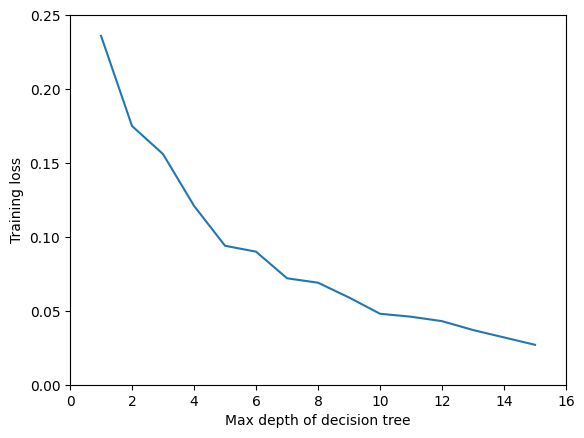

In [170]:
import matplotlib.pyplot as plt

def loss_plot(ax, title, tree, pruned_tree, train_data, test_data):
    '''
        Example plotting code. This plots four curves: the training and testing
        average loss using tree and pruned tree.
        You do not need to change this code!
        Arguments:
            - ax: A matplotlib Axes instance.
            - title: A title for the graph (string)
            - tree: An unpruned DecisionTree instance
            - pruned_tree: A pruned DecisionTree instance
            - train_data: Training dataset returned from get_data
            - test_data: Test dataset returned from get_data
    '''
    fontsize=8
    ax.plot(tree.loss_plot_vec(train_data), label='train non-pruned')
    ax.plot(tree.loss_plot_vec(test_data), label='test non-pruned')
    ax.plot(pruned_tree.loss_plot_vec(train_data), label='train pruned')
    ax.plot(pruned_tree.loss_plot_vec(test_data), label='test pruned')


    ax.locator_params(nbins=3)
    ax.set_xlabel('number of nodes', fontsize=fontsize)
    ax.set_ylabel('loss', fontsize=fontsize)
    ax.set_title(title, fontsize=fontsize)
    legend = ax.legend(loc='upper center', shadow=True, fontsize=fontsize-2)

def explore_dataset(filename, class_name):
    train_data, validation_data, test_data = get_data(filename, class_name)

    # TODO: Print 12 loss values associated with the dataset.
    # For each measure of gain (training error, entropy, gini):
    #      (a) Print average training loss (not-pruned)
    #      (b) Print average test loss (not-pruned)
    #      (c) Print average training loss (pruned)
    #      (d) Print average test loss (pruned)
    
    gain_functions = [
        ('Training Error', node_score_error),
        ('Entropy', node_score_entropy),
        ('Gini', node_score_gini)
    ]

    results = {
        'Loss Type': ['Train Loss (Not-Pruned)', 'Test Loss (Not-Pruned)', 'Train Loss (Pruned)', 'Test Loss (Pruned)'],
    }

    for name, gain_function in gain_functions:
        tree = DecisionTree(train_data, validation_data=None, gain_function=gain_function)

        pruned_tree = DecisionTree(train_data, validation_data=validation_data, gain_function=gain_function)

        train_loss_non_pruned = tree.loss(train_data)
        test_loss_non_pruned = tree.loss(test_data)
        train_loss_pruned = pruned_tree.loss(train_data)
        test_loss_pruned = pruned_tree.loss(test_data)

        results[name] = [
            train_loss_non_pruned, 
            test_loss_non_pruned, 
            train_loss_pruned, 
            test_loss_pruned
        ]

    df = pd.DataFrame(results)

    df.set_index('Loss Type', inplace=True)

    print(df)
        

    # TODO: Feel free to print or plot anything you like here. Just comment
    # make sure to comment it out, or put it in a function that isn't called
    # by default when you hand in your code!

    #Question 2
    # if filename == 'data/spam.csv':
    #     loss = []
    #     for i in range(1,16):
    #         tree = DecisionTree(train_data,gain_function=node_score_entropy,max_depth = i)
    #         loss.append(tree.loss(train_data))
    #     print(loss)
    #     x = np.arange(1,16)
    #     plt.plot(x, np.array(loss))
    #     plt.axis([0, 16, 0, 0.25])
    #     plt.xlabel('Max depth of decision tree')
    #     plt.ylabel('Training loss')
    #     plt.show()


########### PLEASE DO NOT CHANGE THESE LINES OF CODE! ###################
random.seed(1)
np.random.seed(1)
#########################################################################
print("Chess Dataset Results:")
print()
explore_dataset('data/chess.csv', 'won')
print()

print("Spam Dataset Results:")
print()
explore_dataset('data/spam.csv', '1')

## **Project Report** (10 points)

### **Question 1**

Comment on the results of your final program. Discuss the
differences in training and test error of pruned and non-pruned
trees. Which measure of gain most effectively reduced training
error? Was pruning effective? Use tables or graphs to demonstrate
your findings.

**Solution:**

The findings show a clear difference between the training and test errors of pruned versus non-pruned decision trees. Pruned trees tended to have a small rise in training error but showed a significant reduction in test error, indicating that pruning helped combat overfitting. Among the gain measures, entropy was the most effective at minimizing training error across both datasets. The tables underline the variations in average losses, illustrating that pruned trees had better generalization on unseen data. Ultimately, pruning proved to enhance model performance by balancing complexity with accuracy.

### **Question 2**
Using the `spam.csv` dataset, plot the loss of your decision tree on
the *training* set for trees with maximum depth set to each value
between $1$ to $15$. For these plots, the trees should not be pruned
and you can use the entropy gain function. Discuss any trends you
find and attempt to explain them in three to five sentences. (10
points)

*Note: Your graph should be (or close to) monotonically decreasing.*

**Solution:**

The graph shows that as the maximum depth of the tree increases, training error initially decreases. Eventually, the training loss levels off and stays unchanged with further depth increases. Consequently, a shallow decision tree is too simplistic, resulting in underfitting. On the other hand, a sufficiently deep tree can include enough nodes to effectively learn from the training data. In such cases, increasing the maximum depth does not reduce training loss further, and an overly complex decision tree may lead to overfitting.